<a href="https://colab.research.google.com/github/yashmankar1120/Fake_News_Grp8/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import re
import string
from textblob import TextBlob, Word, Blobber
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))
import plotly.express as px
from nltk.stem import WordNetLemmatizer 
from tensorflow.keras.preprocessing.text import one_hot
nltk.download('stopwords')
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, LeavePOut, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake-news/train.csv')

In [ ]:
len(df)

20800

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df = df.dropna()

In [ ]:
from tqdm.notebook import tqdm, trange
from nltk.stem import PorterStemmer
!pip install autocorrect
from autocorrect import Speller
from autocorrect import Speller

spell = Speller(lang='en')

porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
def lower_text(text):
    return str(text).lower()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    stoplist = stopwords.words('english')
    sps = stoplist
    return " ".join([word for word in str(text).split() if word not in sps])

def autospell(text):
    return " ".join([spell(word) for word in text.split()])

corpus=[]
def get_corpus(sentence):
    cps = []
    token_words=word_tokenize(sentence)
    for word in token_words:
        corpus.append(word)
    return sentence


def return_corpus(all_sentences):
    corpus=[]
    for sentence in all_sentences:
        cps = []
        token_words=word_tokenize(sentence)
        for word in token_words:
            corpus.append(word)
    return set(corpus)
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 5.2 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=30dc7f6efe4c8c75d1d42d5e7a40af2ba4c6f5d995e8379cd05ca19de1072587
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
nltk.download('omw-1.4')
df['text'] = df['text'].apply(remove_stopwords)
# df['title'] = df['title'].apply(remove_stopwords)

df['text'] = df['text'].apply(lemmatization)
# df['lemmatized_title'] = df['title'].apply(lemmatization)

df['text'] = df['text'].apply(lower_text)
# df['title'] = df['title'].apply(lower_text)
# df['author'] = df['author'].apply(lower_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df['text'] = df['text'].apply(get_corpus)
df['title'] = df['title'].apply(get_corpus)
df['author'] = df['author'].apply(get_corpus)


In [ ]:
corpus = set(corpus)

In [ ]:
df['text']

0        house dem aide: we didn’t even see comey’s let...
1        ever get feeling life circle roundabout rather...
2        why truth might get you fired october 29, 2016...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman sentenced six year pris...
                               ...                        
20795    rapper t. i. unloaded black celebrity met dona...
20796    when green bay packers lost washington redskin...
20797    the macy’s today grew union several great name...
20798    nato, russia to hold parallel exercises in bal...
20799    david swanson author, activist, journalist, ra...
Name: text, Length: 18285, dtype: object

In [ ]:
len(corpus)

218189

#EDA

In [ ]:
y_eda=df['label']
X_eda=df.drop('label',axis=1)


In [ ]:
len(df[df['label']==1]), len(df[df['label']==0])

(7924, 10361)

Text(0.5, 1.0, 'Bar Chart of label')

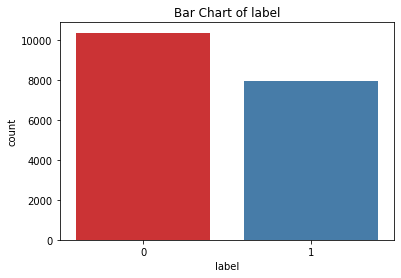

In [ ]:
import seaborn as sns
ax = sns.countplot(x = "label", data = df, palette = "Set1")
ax.set_title("Bar Chart of label")

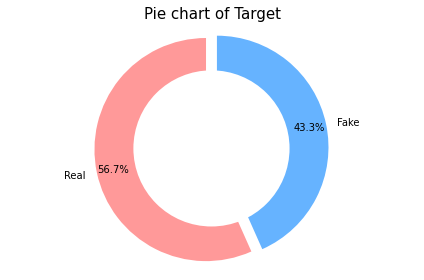

In [ ]:
#Pie chart of Target
labels = [ 'Real','Fake']
values = df['label'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Pie chart of Target", 
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

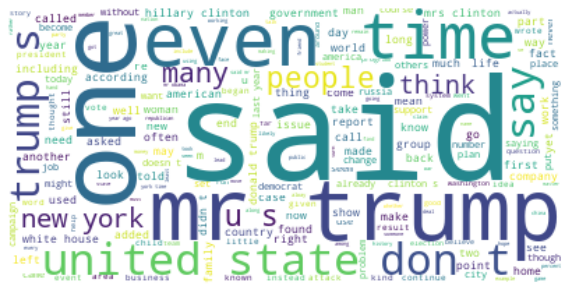

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Join question into one text
text = " ".join(text for text in df['text'])

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

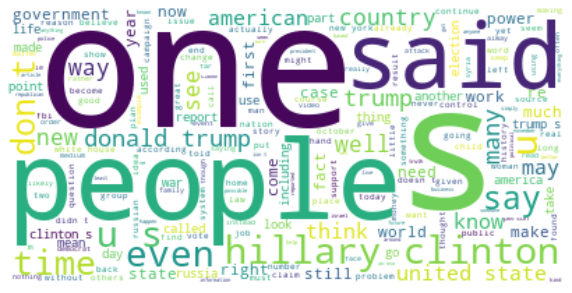

In [ ]:
#WordCloud for Fake News
text_fake = df.loc[df["label"] == 1, "text"]
text = " ".join(text for text in text_fake)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

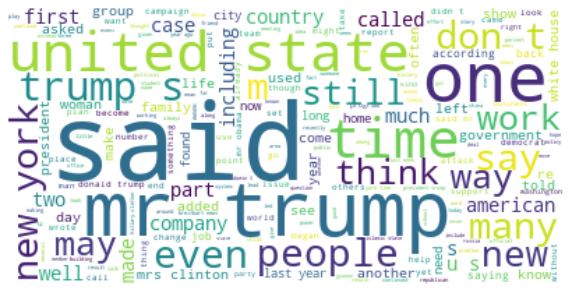

In [ ]:
#WordCloud for Legitimate News
text_real = df.loc[df["label"] == 0, "text"]
text = " ".join(text for text in text_real)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


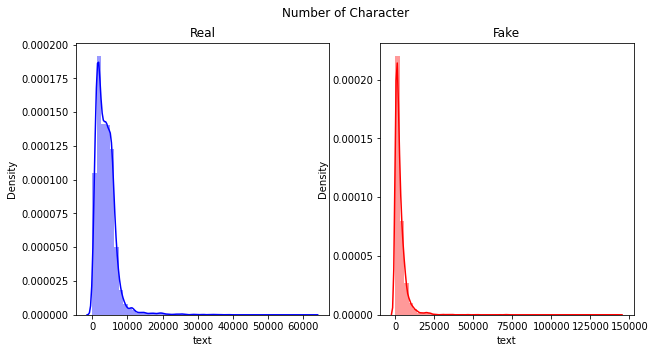

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_char1 = df.loc[df['label'] == 0, "text"].str.len()
sns.distplot(num_char1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_char2 = df.loc[df['label'] == 1, "text"].str.len()
sns.distplot(num_char2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Character")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


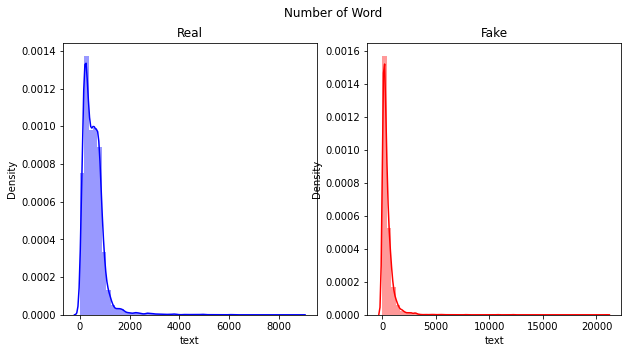

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_word1 = df.loc[df['label'] == 0, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_word2 = df.loc[df['label'] == 1, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Word")

plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
# Ngram Analysis:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


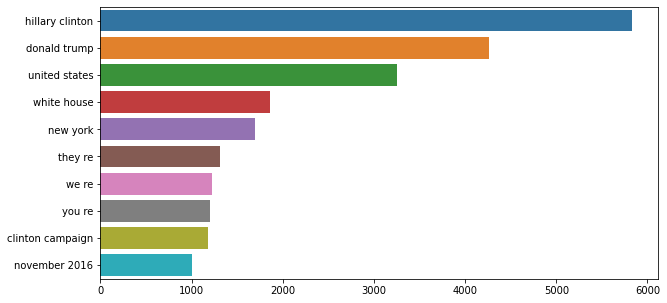

In [ ]:
plt.figure(figsize=(10,5))
fake_df = df[df['label']==1]
top_tweet_bigrams=get_top_tweet_bigrams(fake_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

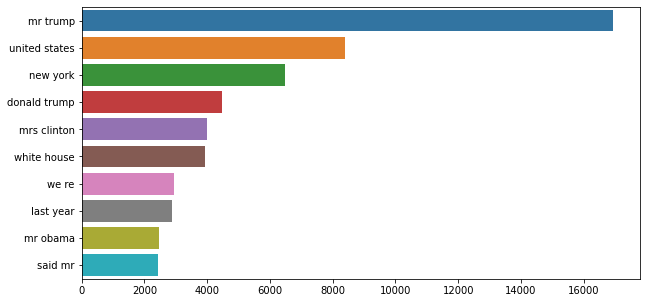

In [ ]:
plt.figure(figsize=(10,5))
true_df = df[df['label']==0]
top_tweet_bigrams=get_top_tweet_bigrams(true_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
X = df['text']
y = df['label']

# Vectorise

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
X = df.drop('label', axis=1)
X = df['text']
y = df['label']
#t = time()  # not compulsory

# loading CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
#tf_vectorizer = CountVectorizer() # or term frequency
#tf_vectorizer = TfidfVectorizer()
tf_vectorizer = HashingVectorizer()

X_tf = tf_vectorizer.fit_transform(X)

#duration = time() - t
#print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_tf.shape)

n_samples: 18285, n_features: 1048576


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12250, 1048576), (6035, 1048576), (12250,), (6035,))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


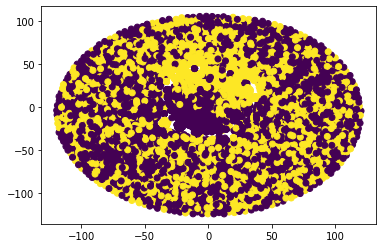

In [ ]:
from sklearn.manifold import TSNE
def TSNE_plot(data,data_labels):
        tsne = TSNE(n_components=2, random_state=50)
        transformed_data = tsne.fit_transform(data)
        k = np.array(transformed_data)
        Group=["Class 0","Class 1"]
        plt.scatter(k[:, 0],k[:, 1], c=data_labels)
        #plt.legend(loc="lower right")
        plt.show()
TSNE_plot(X_train,y_train)

In [ ]:
#MultinomialNB
'''naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)
t = time()
y_pred = naive_bayes_classifier.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')'''

'naive_bayes_classifier = MultinomialNB()\nnaive_bayes_classifier.fit(X_train, y_train)\nt = time()\ny_pred = naive_bayes_classifier.predict(X_test)\n\ntest_time = time() - t\nprint("test time:  %0.3fs" % test_time)\n\n# compute the performance measures\nscore1 = metrics.accuracy_score(y_test, y_pred)\nprint("accuracy:   %0.3f" % score1)\n\nprint(metrics.classification_report(y_test, y_pred))\n\nprint("confusion matrix:")\nprint(metrics.confusion_matrix(y_test, y_pred))\n\nprint(\'------------------------------\')'

In [ ]:
t = time()
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)
y_pred = clf.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

train time: 394.580s
test time:  596.349s
accuracy:   0.567
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3419
           1       0.00      0.00      0.00      2616

    accuracy                           0.57      6035
   macro avg       0.28      0.50      0.36      6035
weighted avg       0.32      0.57      0.41      6035

confusion matrix:
[[3419    0]
 [2616    0]]
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.032s
accuracy:   0.887
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      3419
           1       0.87      0.87      0.87      2616

    accuracy                           0.89      6035
   macro avg       0.89      0.88      0.88      6035
weighted avg       0.89      0.89      0.89      6035

confusion matrix:
[[3087  332]
 [ 351 2265]]


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.014s
accuracy:   0.943
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3419
           1       0.94      0.92      0.93      2616

    accuracy                           0.94      6035
   macro avg       0.94      0.94      0.94      6035
weighted avg       0.94      0.94      0.94      6035

confusion matrix:
[[3278  141]
 [ 203 2413]]


In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.048s
accuracy:   0.931
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3419
           1       0.92      0.92      0.92      2616

    accuracy                           0.93      6035
   macro avg       0.93      0.93      0.93      6035
weighted avg       0.93      0.93      0.93      6035

confusion matrix:
[[3209  210]
 [ 207 2409]]


In [ ]:
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.014s
accuracy:   0.962
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3419
           1       0.96      0.95      0.96      2616

    accuracy                           0.96      6035
   macro avg       0.96      0.96      0.96      6035
weighted avg       0.96      0.96      0.96      6035

confusion matrix:
[[3316  103]
 [ 127 2489]]
